In [1]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel('cardiac_risk.csv.xlsx')

In [3]:
data

,id,age in days,age,gender,height_in_cm,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,52,2,168,62.0,110,80,95.0,1,1,0,0,1,0
1,1,20228,57,1,156,85.0,140,90,115.0,3,1,0,0,1,1
2,2,18857,53,1,165,64.0,130,70,100.0,3,1,0,0,0,1
3,3,17623,50,2,169,82.0,150,100,125.0,1,1,0,0,1,1
4,4,17474,49,1,156,56.0,100,60,80.0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,54,2,168,76.0,120,80,100.0,1,1,1,0,1,0
69996,99995,22601,63,1,158,126.0,140,90,115.0,2,2,0,0,1,1
69997,99996,19066,54,2,183,105.0,180,90,135.0,3,1,0,1,0,1
69998,99998,22431,63,1,163,72.0,135,80,107.5,1,2,0,0,0,1


In [4]:
data=data.drop(['id'],axis=1)
data.columns

Index(['age in days', 'age', 'gender', 'height_in_cm', 'weight_in_kg', 'bp_hi',
       'bp_lo', 'avg_heart_rate', 'cholesterol', 'gluc', 'smoke', 'alco',
       'active', 'cardio'],
      dtype='object')

In [5]:
data.isnull().sum()

age in days       0
age               0
gender            0
height_in_cm      0
weight_in_kg      0
bp_hi             0
bp_lo             0
avg_heart_rate    0
cholesterol       0
gluc              0
smoke             0
alco              0
active            0
cardio            0
dtype: int64

<AxesSubplot:>

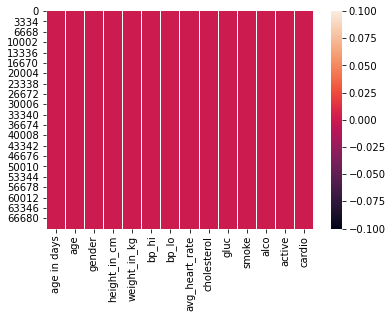

In [6]:
sns.heatmap(data.isnull())

In [7]:
data.columns

Index(['age in days', 'age', 'gender', 'height_in_cm', 'weight_in_kg', 'bp_hi',
       'bp_lo', 'avg_heart_rate', 'cholesterol', 'gluc', 'smoke', 'alco',
       'active', 'cardio'],
      dtype='object')

In [8]:
data['cardio'].value_counts()

0    35021
1    34979
Name: cardio, dtype: int64

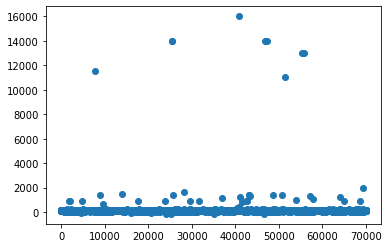

In [9]:
import matplotlib.pyplot as plt
plt.scatter(data.index, data['bp_hi'])

In [15]:
li = list(data['bp_hi'].sort_values()[-9:].index)
li

[25780, 43133, 50836, 8915, 43208, 13895, 28147, 69370, 51438]

In [16]:
data = data.drop(li,axis = 0)

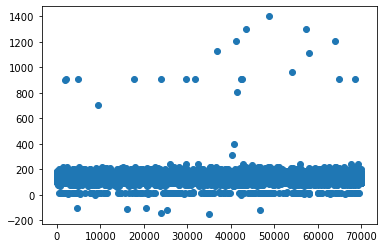

In [17]:
plt.scatter(data.index, data['bp_hi'])

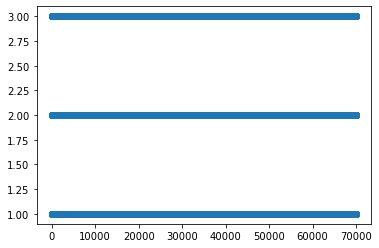

In [13]:
import matplotlib.pyplot as plt
plt.scatter(data.index, data['cholesterol'])

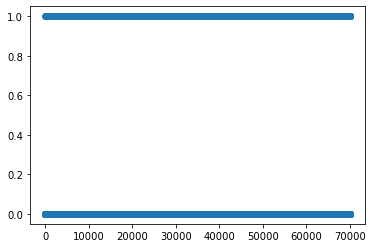

In [14]:
import matplotlib.pyplot as plt
plt.scatter(data.index, data['smoke'])

In [18]:
data.head()

,age in days,age,gender,height_in_cm,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
0,18393,52,2,168,62.0,110,80,95.0,1,1,0,0,1,0
1,20228,57,1,156,85.0,140,90,115.0,3,1,0,0,1,1
2,18857,53,1,165,64.0,130,70,100.0,3,1,0,0,0,1
3,17623,50,2,169,82.0,150,100,125.0,1,1,0,0,1,1
4,17474,49,1,156,56.0,100,60,80.0,1,1,0,0,0,0


In [19]:
data.reset_index(drop=True,inplace=True)

In [20]:
data.head()

,age in days,age,gender,height_in_cm,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
0,18393,52,2,168,62.0,110,80,95.0,1,1,0,0,1,0
1,20228,57,1,156,85.0,140,90,115.0,3,1,0,0,1,1
2,18857,53,1,165,64.0,130,70,100.0,3,1,0,0,0,1
3,17623,50,2,169,82.0,150,100,125.0,1,1,0,0,1,1
4,17474,49,1,156,56.0,100,60,80.0,1,1,0,0,0,0


In [21]:
encoder = preprocessing.LabelEncoder()

for i in data.columns:                              
    if isinstance(data[i][0], str):
            data[i] = encoder.fit_transform(data[i])

In [22]:
data.head()

,age in days,age,gender,height_in_cm,weight_in_kg,bp_hi,bp_lo,avg_heart_rate,cholesterol,gluc,smoke,alco,active,cardio
0,18393,52,2,168,62.0,110,80,95.0,1,1,0,0,1,0
1,20228,57,1,156,85.0,140,90,115.0,3,1,0,0,1,1
2,18857,53,1,165,64.0,130,70,100.0,3,1,0,0,0,1
3,17623,50,2,169,82.0,150,100,125.0,1,1,0,0,1,1
4,17474,49,1,156,56.0,100,60,80.0,1,1,0,0,0,0


In [26]:
data.cardio.value_counts() 

0    35018
1    34965
Name: cardio, dtype: int64

In [27]:
data.cardio.value_counts()[0]-data.cardio.value_counts()[1] # diffrence

53

In [28]:
li = data[data['cardio']==0].sample(53).index
li


Int64Index([48618, 56309, 66199,  2210, 54668, 49571, 49952, 43475, 20127,
            41073, 15342, 62828,  7900, 28862,  6548, 69150, 23073, 14636,
            15772, 15899,  3652, 18873, 44412, 15413, 44679, 20827, 32554,
            22520, 65958,   225, 67922, 29743, 63185, 62222, 58319, 10867,
            23596, 64608, 24909, 56630, 37151, 55366, 33848, 25855, 18340,
            29208, 26844, 56508, 22074, 60191, 41212, 11428, 51015],
           dtype='int64')

In [29]:
data = data.drop(li, axis = 0)
data.cardio.value_counts()

0    34965
1    34965
Name: cardio, dtype: int64

In [30]:
X = data.drop(['cardio'], axis=1)
y = data['cardio']

###  Training and Testing with Logic Regression

In [31]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# Train the model using 'fit' method
model.fit(X_train, y_train)

# Test the model using 'predict' method
y_pred = model.predict(X_test)

# Print the classification report 
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.74      0.71      7015
           1       0.71      0.66      0.68      6971

    accuracy                           0.70     13986
   macro avg       0.70      0.70      0.70     13986
weighted avg       0.70      0.70      0.70     13986



Print the Confusion Matrix
[[5183 1832]
 [2388 4583]]


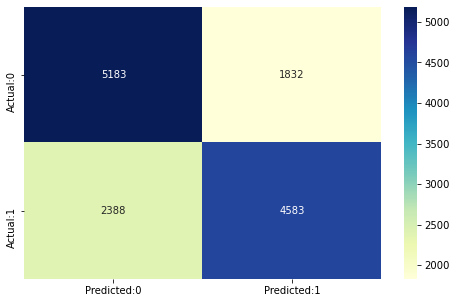

In [34]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print('Print the Confusion Matrix')
print(cm)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");